<a href="https://colab.research.google.com/github/andref03/Previsao-de-fraudes-financeiras-com-uso-do-algoritmo-PC/blob/main/analise_numerica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de fraudes

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
import pandas as pd

dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dados_fraude.csv')

dados # visualização

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
9994,PAYMENT,115.38,C150330556,249688.0,249572.62,M714481123,0.0,0.0,0
9995,PAYMENT,466.73,C517929856,881.0,414.27,M2128130537,0.0,0.0,0
9996,PAYMENT,8239.66,C1483641522,11515.0,3275.34,M1108211033,0.0,0.0,0
9997,PAYMENT,6063.34,C728110179,31409.0,25345.66,M277524255,0.0,0.0,0


In [ ]:
dados.info() # visualização

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            9999 non-null   object 
 1   amount          9999 non-null   float64
 2   nameOrig        9999 non-null   object 
 3   oldbalanceOrg   9999 non-null   float64
 4   newbalanceOrig  9999 non-null   float64
 5   nameDest        9999 non-null   object 
 6   oldbalanceDest  9999 non-null   float64
 7   newbalanceDest  9999 non-null   float64
 8   isFraud         9999 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 703.2+ KB


### Separação de variáveis

---

In [ ]:
x = dados.drop('isFraud', axis = 1)
y = dados['isFraud']

### Excluindo variáveis não explicativas

---

In [ ]:
x.nameOrig.value_counts()

,count
nameOrig,
C1231006815,1
C1569330262,1
C354764137,1
C328246293,1
C979049207,1
...,...
C1504912697,1
C1531409183,1
C1086508626,1


> Temos 1 valor nameOrig para cada dado na tabela, portanto esta variável não explica o comportamento dos dados.



In [ ]:
x.nameDest.value_counts()

,count
nameDest,
C985934102,62
C1590550415,52
C1286084959,50
C1899073220,44
C1782113663,43
...,...
M381768094,1
M930641076,1
C67985650,1


> Temos poucas repetições de valores nameDest na tabela, portanto esta variável não explica muito bem o comportamento dos dados.



In [ ]:
# removendo as colunas não explicativas
x = x.drop(columns='nameOrig')
x = x.drop(columns='nameDest')
x # visualização

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0
...,...,...,...,...,...,...
9994,PAYMENT,115.38,249688.0,249572.62,0.0,0.0
9995,PAYMENT,466.73,881.0,414.27,0.0,0.0
9996,PAYMENT,8239.66,11515.0,3275.34,0.0,0.0
9997,PAYMENT,6063.34,31409.0,25345.66,0.0,0.0


### Padronizando as variáveis explicativas (x) e alvo (y)

---

In [ ]:
# verificando quais colunas não são numéricas
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            9999 non-null   object 
 1   amount          9999 non-null   float64
 2   oldbalanceOrg   9999 non-null   float64
 3   newbalanceOrig  9999 non-null   float64
 4   oldbalanceDest  9999 non-null   float64
 5   newbalanceDest  9999 non-null   float64
dtypes: float64(5), object(1)
memory usage: 468.8+ KB


> Como a coluna type é do tipo Object, devemos transformá-la em um valor numérico, fazemos isso através de um mapeamento.

In [ ]:
# verifica quais são os tipos de dados da coluna type
x.type.value_counts()

,count
type,
PAYMENT,5464
CASH_IN,1949
CASH_OUT,1321
TRANSFER,921
DEBIT,344


In [ ]:
# transforma os valores de type em float (mapeamento)
x['type'] = x['type'].map({
    'PAYMENT': 0.0,
    'CASH_IN': 1.0,
    'CASH_OUT': 2.0,
    'TRANSFER': 3.0,
    'DEBIT': 4.0
})

# exibe o DataFrame para verificar a conversão
x

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.0,9839.64,170136.0,160296.36,0.0,0.0
1,0.0,1864.28,21249.0,19384.72,0.0,0.0
2,3.0,181.00,181.0,0.00,0.0,0.0
3,2.0,181.00,181.0,0.00,21182.0,0.0
4,0.0,11668.14,41554.0,29885.86,0.0,0.0
...,...,...,...,...,...,...
9994,0.0,115.38,249688.0,249572.62,0.0,0.0
9995,0.0,466.73,881.0,414.27,0.0,0.0
9996,0.0,8239.66,11515.0,3275.34,0.0,0.0
9997,0.0,6063.34,31409.0,25345.66,0.0,0.0


In [ ]:
# confirmando se a conversão de Object para float ocorreu
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            9999 non-null   float64
 1   amount          9999 non-null   float64
 2   oldbalanceOrg   9999 non-null   float64
 3   newbalanceOrig  9999 non-null   float64
 4   oldbalanceDest  9999 non-null   float64
 5   newbalanceDest  9999 non-null   float64
dtypes: float64(6)
memory usage: 468.8 KB


##### Definindo os dados antes do uso do PCA

In [ ]:
# para concatenar x e y, devemos transformar as duas variáveis em dataframes
x = pd.DataFrame(x, columns=x.columns)
y = pd.DataFrame(y, columns=['isFraud'])

# vamos armazenar esses dados na variável dadosIniciais (antes de aplicar o PCA)
dadosIniciais = pd.concat([x, y], axis=1)
dadosIniciais # visualização

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0.0,9839.64,170136.0,160296.36,0.0,0.0,0
1,0.0,1864.28,21249.0,19384.72,0.0,0.0,0
2,3.0,181.00,181.0,0.00,0.0,0.0,1
3,2.0,181.00,181.0,0.00,21182.0,0.0,1
4,0.0,11668.14,41554.0,29885.86,0.0,0.0,0
...,...,...,...,...,...,...,...
9994,0.0,115.38,249688.0,249572.62,0.0,0.0,0
9995,0.0,466.73,881.0,414.27,0.0,0.0,0
9996,0.0,8239.66,11515.0,3275.34,0.0,0.0,0
9997,0.0,6063.34,31409.0,25345.66,0.0,0.0,0


### Aplicação do PCA

---

In [ ]:
# verificamos a correlação entre as variáveis
x.corr()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
type,1.000000,0.385978,0.039745,0.035807,0.261088,0.304897
amount,0.385978,1.000000,0.123181,0.089847,0.347834,0.412855
oldbalanceOrg,0.039745,0.123181,1.000000,0.996727,0.228118,0.198170
newbalanceOrig,0.035807,0.089847,0.996727,1.000000,0.236310,0.202458
oldbalanceDest,0.261088,0.347834,0.228118,0.236310,1.000000,0.944480
newbalanceDest,0.304897,0.412855,0.198170,0.202458,0.944480,1.000000


> Podemos perceber que a diagonal principal é 1.0, pois é o ponto de encontro da mesma variável; quanto mais próximo de 1.0, maior é a correlação. Vemos que há baixa correlação entre oldbalanceOrg e type, porém há alta correlação entre oldbalanceOrg e newbalanceOrg, por exemplo.

In [ ]:
# instalando biblioteca p/ permitir manipulação dos dados com PCA e seus fatores
!pip install factor_analyzer

##### Calculando KMO

> Vamos calcular o KMO, que é uma métrica que diz se os dados são apropriados para análise fatorial. Acima de 0.5, é possível considerar.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_variaveis, kmo = calculate_kmo(x)
kmo # visualização do kmo global

0.5203702916357247

##### Ajustando as variáveis com StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
# armazena o nome das colunas, p/ permitir que os dados sejam padronizados posteriormente
colunas_numericas = x.columns
colunas_numericas

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')

In [ ]:
padronizacao = StandardScaler()
# ajusta/padroniza os dados com o fit_transform()
x = padronizacao.fit_transform(x)
# agora as variáveis numéricas estão em formato de array
x

array([[-0.75408377, -0.35191515, -0.33894819, -0.3461354 , -0.34912412,
        -0.36381649],
       [-0.75408377, -0.38186332, -0.40866272, -0.41073194, -0.34912412,
        -0.36381649],
       [ 1.83701026, -0.38818419, -0.41852755, -0.41961826, -0.34912412,
        -0.36381649],
       ...,
       [-0.75408377, -0.35792321, -0.41322055, -0.41811678, -0.34912412,
        -0.36381649],
       [-0.75408377, -0.36609549, -0.40390542, -0.40799933, -0.34912412,
        -0.36381649],
       [ 1.83701026,  0.8045279 , -0.41350805, -0.41961826, -0.31057572,
        -0.36381649]])

In [ ]:
# formata os dados (já ajustados/padronizados) com o nome original das colunas, melhorando a visualização
dados_padronizados = pd.DataFrame(x, columns = colunas_numericas)
dados_padronizados

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,-0.754084,-0.351915,-0.338948,-0.346135,-0.349124,-0.363816
1,-0.754084,-0.381863,-0.408663,-0.410732,-0.349124,-0.363816
2,1.837010,-0.388184,-0.418528,-0.419618,-0.349124,-0.363816
3,0.973312,-0.388184,-0.418528,-0.419618,-0.341210,-0.363816
4,-0.754084,-0.345049,-0.399155,-0.405918,-0.349124,-0.363816
...,...,...,...,...,...,...
9994,-0.754084,-0.388431,-0.301699,-0.305209,-0.349124,-0.363816
9995,-0.754084,-0.387111,-0.418200,-0.419428,-0.349124,-0.363816
9996,-0.754084,-0.357923,-0.413221,-0.418117,-0.349124,-0.363816
9997,-0.754084,-0.366095,-0.403905,-0.407999,-0.349124,-0.363816


##### Extraindo os fatores do PCA

In [ ]:
from sklearn.decomposition import PCA
# extrai a qtdd de fatores (variáveis) dos dados
n_fatores = dados_padronizados.shape[1]
n_fatores

6

In [ ]:
# faz o ajustamento dos dados padronizados em fatores
pca = PCA(n_components = n_fatores)
pca.fit(dados_padronizados)

PCA(n_components=6)

In [ ]:
# retorna a porcentagem da variância explicada  p/ cada fator do PCA, em forma de array
pca.explained_variance_ratio_

array([4.46660348e-01, 2.87379013e-01, 1.56521287e-01, 1.00362693e-01,
       8.66520577e-03, 4.11453197e-04])

In [ ]:
import plotly.express as px
import numpy as np

# nomeia os fatores
fatores = [f'F{i+1}' for i in range(n_fatores)]
fatores

['F1', 'F2', 'F3', 'F4', 'F5', 'F6']

In [ ]:
# visualizando as porcentagens de cada fator

fig = px.bar(x = fatores, y = pca.explained_variance_ratio_, text = np.around(pca.explained_variance_ratio_, decimals = 2), title = "Scree Plot")

fig.update_layout(yaxis = {'title': 'Porcentagem de Variância Explicada', 'tickfont': {'size':15}},
                  xaxis = {'title': 'Fatores', 'tickfont':{'size':15}},
                  title = {'font':{'size':25}}
                  )

fig.show()

> O gráfico acima nos permite perceber que o fator F1 explica 45% dos dados, enquanto o fator F2 explica 29%, e assim por diante.

In [ ]:
# a variância acumulada tem nome intuitivo, representando a soma dos fatores (F1, F1+F2, F1+F2+F3, etc.) em um array
variancia_acumulada = [sum(pca.explained_variance_ratio_[0:i+1]) for i in range(n_fatores)]
variancia_acumulada

[0.44666034835814905,
 0.7340393615516349,
 0.8905606483375375,
 0.9909233410346028,
 0.999588546803228,
 0.9999999999999999]

In [ ]:
# visualizando o somatório das porcentagens de fatores (F1, F1+F2, F1+F2+F3, etc.)

fig = px.bar(x = fatores, y = variancia_acumulada, text = np.around(variancia_acumulada, decimals = 2), title = "Scree Plot")

fig.update_layout(yaxis = {'title': 'Porcentagem de Variância Explicada', 'tickfont': {'size':15}},
                  xaxis = {'title': 'Fatores', 'tickfont':{'size':15}},
                  title = {'font':{'size':25}}
                  )

fig.show()

> O gráfico acima é a representação do somatório dos fatores (acumulados gradualmente).

##### Autovalores

In [ ]:
# irá retornar o seguinte array: [F1 explica esta qtdd de variáveis, F2 explica esta qtdd de variáveis, ...]
pca.explained_variance_

array([2.68023014e+00, 1.72444654e+00, 9.39221652e-01, 6.02236386e-01,
       5.19964348e-02, 2.46896610e-03])

In [ ]:
# retorna o mesmo array acima, com pequenas diferenças
pca.explained_variance_ratio_ * n_fatores

array([2.67996209e+00, 1.72427408e+00, 9.39127721e-01, 6.02176156e-01,
       5.19912346e-02, 2.46871918e-03])

> Os autovalores de cada fator dizem quantas variáveis são explicadas por aquele determinado fator. Por exemplo, o autovalor de F1 resultou em 2.6, porque F1 explica 2.6 variáveis da database original, aproximadamente.

In [ ]:
# descobre qual explicação é mais precisa: será aquela que mais se aproximas à qtdd de variáveis (ou n_fatores)
print(sum(pca.explained_variance_))
print(sum(pca.explained_variance_ratio_ * n_fatores))

6.000600120024
6.0


In [ ]:
# escolhido:
autovalores = pca.explained_variance_ratio_ * n_fatores

In [ ]:
fatores_selecionados = ['Fator selecionado' if autovalor >= 0.9 else 'Fator não selecionado' for autovalor in autovalores]
fatores_selecionados

['Fator selecionado',
 'Fator selecionado',
 'Fator selecionado',
 'Fator não selecionado',
 'Fator não selecionado',
 'Fator não selecionado']

> Usamos o **Critério de Kaiser** para definir quais são os autovalores adequados para os fatores. Este critério diz que devemos selecionar apenas autovalores maiores que 1. Como neste trabalho obtivemos um autovalor muito próximo, porém abaixo, então consideramos o limite inferior sendo 0.9 em vez de 1.

In [ ]:
# cria um database (chamado resumo) para melhorar a visualização das informações
resumo = pd.DataFrame({'Fator': fatores, 'Autovalor': autovalores, 'Variância explicada': pca.explained_variance_ratio_, 'Variância acumulada': variancia_acumulada})
resumo

,Fator,Autovalor,Variância explicada,Variância acumulada
0,F1,2.679962,0.446660,0.446660
1,F2,1.724274,0.287379,0.734039
2,F3,0.939128,0.156521,0.890561
3,F4,0.602176,0.100363,0.990923
4,F5,0.051991,0.008665,0.999589
5,F6,0.002469,0.000411,1.000000


In [ ]:
# retorna um array com os autovetores (de cada fator)
pca.components_

array([[ 0.26610141,  0.33967143,  0.38920979,  0.38694619,  0.50454638,
         0.50797115],
       [ 0.30298545,  0.27921374, -0.58090685, -0.5850713 ,  0.25296206,
         0.29408928],
       [ 0.66250791,  0.46446918,  0.10775701,  0.08292397, -0.433243  ,
        -0.37304718],
       [-0.63095178,  0.76631987,  0.00359728, -0.03668537, -0.10002197,
        -0.05736334],
       [-0.01858772, -0.05233831,  0.02075836,  0.00419207, -0.69530441,
         0.71625309],
       [ 0.00524167, -0.03075615,  0.70640466, -0.70691191,  0.01705985,
        -0.00188605]])

In [ ]:
# melhorando a visualização do array acima
pd.DataFrame(pca.components_, columns = colunas_numericas, index = [f'Autovetor {i+1}' for i in range(n_fatores)])

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
Autovetor 1,0.266101,0.339671,0.389210,0.386946,0.504546,0.507971
Autovetor 2,0.302985,0.279214,-0.580907,-0.585071,0.252962,0.294089
Autovetor 3,0.662508,0.464469,0.107757,0.082924,-0.433243,-0.373047
Autovetor 4,-0.630952,0.766320,0.003597,-0.036685,-0.100022,-0.057363
Autovetor 5,-0.018588,-0.052338,0.020758,0.004192,-0.695304,0.716253
Autovetor 6,0.005242,-0.030756,0.706405,-0.706912,0.017060,-0.001886


##### Obtendo as cargas fatoriais

> As cargas fatoriais indicam o quanto cada variável original contribui para a formação de cada fator (varia de 1 a -1)

In [ ]:
# p/ obter as cargas fatoriais, precisamos tirar as raízes dos autovalores
raiz_autovalores = np.sqrt(autovalores)
raiz_autovalores

array([1.63705898, 1.31311617, 0.96908602, 0.7760001 , 0.22801586,
       0.04968621])

In [ ]:
# transforma em dataframe
cargas_fatoriais = pd.DataFrame(pca.components_.T * raiz_autovalores, columns = fatores, index = colunas_numericas)
cargas_fatoriais

,F1,F2,F3,F4,F5,F6
type,0.435624,0.397855,0.642027,-0.489619,-0.004238,0.000260
amount,0.556062,0.366640,0.450111,0.594664,-0.011934,-0.001528
oldbalanceOrg,0.637159,-0.762798,0.104426,0.002791,0.004733,0.035099
newbalanceOrig,0.633454,-0.768267,0.080360,-0.028468,0.000956,-0.035124
oldbalanceDest,0.825972,0.332169,-0.419850,-0.077617,-0.158540,0.000848
newbalanceDest,0.831579,0.386173,-0.361515,-0.044514,0.163317,-0.000094


In [ ]:
# escolhendo abaixo apenas os fatores que foram selecionados anteriormente pelo "Critério de Kaiser"
resumo_cargas_fatoriais = cargas_fatoriais[['F1','F2','F3']].copy()
resumo_cargas_fatoriais

,F1,F2,F3
type,0.435624,0.397855,0.642027
amount,0.556062,0.366640,0.450111
oldbalanceOrg,0.637159,-0.762798,0.104426
newbalanceOrig,0.633454,-0.768267,0.080360
oldbalanceDest,0.825972,0.332169,-0.419850
newbalanceDest,0.831579,0.386173,-0.361515


##### Definindo os dados após uso do PCA

In [ ]:
# transforma em dataframe e nomeia as colunas
x = pd.DataFrame(pca.transform(dados_padronizados), columns = fatores)
colunasFatores = ['F1','F2','F3']
x = x[colunasFatores]
x # visualização

,F1,F2,F3
0,-0.947014,-0.122634,-0.441291
1,-1.009315,-0.052705,-0.468070
2,-0.329246,0.741523,1.243815
3,-0.555084,0.481838,0.668179
4,-0.991247,-0.050766,-0.449547
...,...,...,...
9994,-0.929083,-0.178413,-0.450844
9995,-1.018175,-0.043542,-0.472256
9996,-1.005815,-0.039052,-0.458054
9997,-1.001050,-0.052665,-0.460007


In [ ]:
y # visualização da variável alvo

,isFraud
0,0
1,0
2,1
3,1
4,0
...,...
9994,0
9995,0
9996,0
9997,0


In [ ]:
# converte x e y para dataframe, para permitir a concatenação
x = pd.DataFrame(x, columns=colunasFatores)
y = pd.DataFrame(y, columns=['isFraud'])

# concatenação
dadosPca = pd.concat([x, y], axis=1)

dadosPca # visualização

,F1,F2,F3,isFraud
0,-0.947014,-0.122634,-0.441291,0
1,-1.009315,-0.052705,-0.468070,0
2,-0.329246,0.741523,1.243815,1
3,-0.555084,0.481838,0.668179,1
4,-0.991247,-0.050766,-0.449547,0
...,...,...,...,...
9994,-0.929083,-0.178413,-0.450844,0
9995,-1.018175,-0.043542,-0.472256,0
9996,-1.005815,-0.039052,-0.458054,0
9997,-1.001050,-0.052665,-0.460007,0


### Previsão DummyClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

In [ ]:
dadosIniciais # verificando os dados antes do uso de PCA

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0.0,9839.64,170136.0,160296.36,0.0,0.0,0
1,0.0,1864.28,21249.0,19384.72,0.0,0.0,0
2,3.0,181.00,181.0,0.00,0.0,0.0,1
3,2.0,181.00,181.0,0.00,21182.0,0.0,1
4,0.0,11668.14,41554.0,29885.86,0.0,0.0,0
...,...,...,...,...,...,...,...
9994,0.0,115.38,249688.0,249572.62,0.0,0.0,0
9995,0.0,466.73,881.0,414.27,0.0,0.0,0
9996,0.0,8239.66,11515.0,3275.34,0.0,0.0,0
9997,0.0,6063.34,31409.0,25345.66,0.0,0.0,0


In [ ]:
dadosPca # verificando os dados após o uso do PCA

,F1,F2,F3,isFraud
0,-0.947014,-0.122634,-0.441291,0
1,-1.009315,-0.052705,-0.468070,0
2,-0.329246,0.741523,1.243815,1
3,-0.555084,0.481838,0.668179,1
4,-0.991247,-0.050766,-0.449547,0
...,...,...,...,...
9994,-0.929083,-0.178413,-0.450844,0
9995,-1.018175,-0.043542,-0.472256,0
9996,-1.005815,-0.039052,-0.458054,0
9997,-1.001050,-0.052665,-0.460007,0


##### Previsão DummyClassifier utilizando dados antes do PCA

In [ ]:
xInicial = dadosIniciais.drop('isFraud', axis=1)
yInicial = dadosIniciais['isFraud']
x_treinoInicial, x_testeInicial, y_treinoInicial, y_testeInicial = train_test_split(xInicial, yInicial, stratify = yInicial, random_state = 98)
dummyInicial = DummyClassifier()
dummyInicial.fit(x_treinoInicial, y_treinoInicial)
prevDummyInicial = dummyInicial.score(x_testeInicial, y_testeInicial)

prevDummyInicial

0.9932

##### Previsão DummyClassifier utilizando dados após aplicação do PCA

In [ ]:
xPca = dadosPca.drop('isFraud', axis=1)
yPca = dadosPca['isFraud']
x_treinoPca, x_testePca, y_treinoPca, y_testePca = train_test_split(xPca, yPca, stratify = yPca, random_state = 9)
dummyPca = DummyClassifier()
dummyPca.fit(x_treinoPca, y_treinoPca)
prevDummyPca = dummyPca.score(x_testePca, y_testePca)

prevDummyPca

0.9932

### Arvore de Decisao

---

##### Previsão usando Árvore nos dados antes do PCA

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

arvoreInicial = DecisionTreeClassifier(random_state = 5)
arvoreInicial.fit(x_treinoInicial, y_treinoInicial)

DecisionTreeClassifier(random_state=5)

In [ ]:
arvoreInicial.predict(x_testeInicial)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
arvoreInicial.score(x_testeInicial, y_testeInicial)

0.9952

In [ ]:
nome_colunas_Inicial = ['type',
                'amount',
                'oldbalanceOrg',
                'newbalanceOrig',
                'oldbalanceDest',
                'newbalanceDest'
]

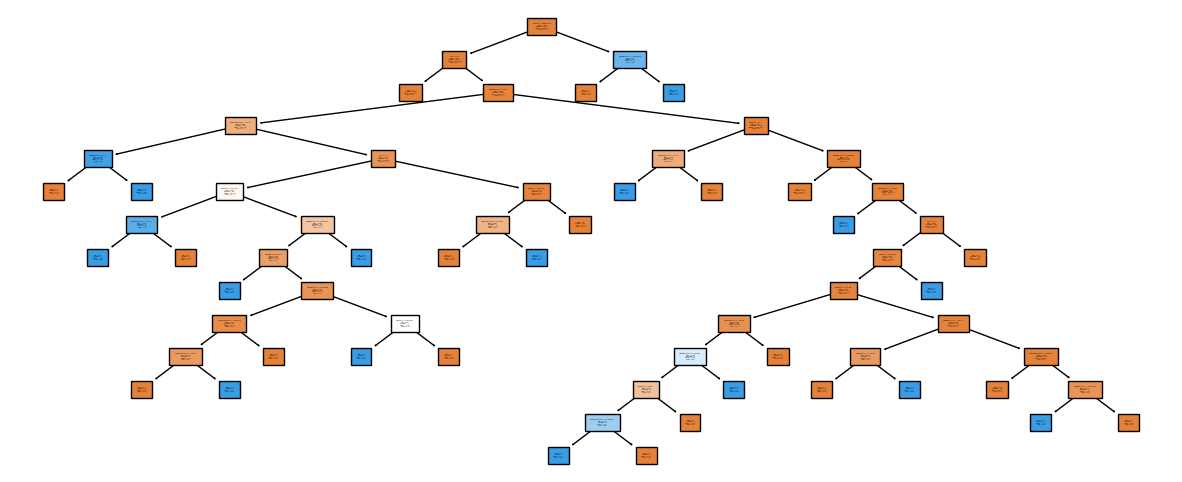

In [ ]:
plt.figure(figsize = (15,6))
plot_tree(arvoreInicial, filled = True, class_names = ['nao','sim'], fontsize = 1, feature_names = nome_colunas_Inicial);

In [ ]:
arvoreInicial.score(x_treinoInicial, y_treinoInicial)

1.0

In [ ]:
arvoreInicial = DecisionTreeClassifier(max_depth = 8, random_state = 58)
arvoreInicial.fit(x_treinoInicial, y_treinoInicial)

DecisionTreeClassifier(max_depth=8, random_state=58)

In [ ]:
prevArvoreInicial = arvoreInicial.score(x_testeInicial, y_testeInicial)
prevArvoreInicial

0.9952

##### Previsão usando árvore nos dados de PCA

In [ ]:
arvorePca = DecisionTreeClassifier(random_state = 5)
arvorePca.fit(x_treinoPca, y_treinoPca)

DecisionTreeClassifier(random_state=5)

In [ ]:
arvorePca.predict(x_testePca)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
arvorePca.score(x_testePca, y_testePca)

0.99

In [ ]:
nome_colunas_Pca = ['F1','F2','F3']

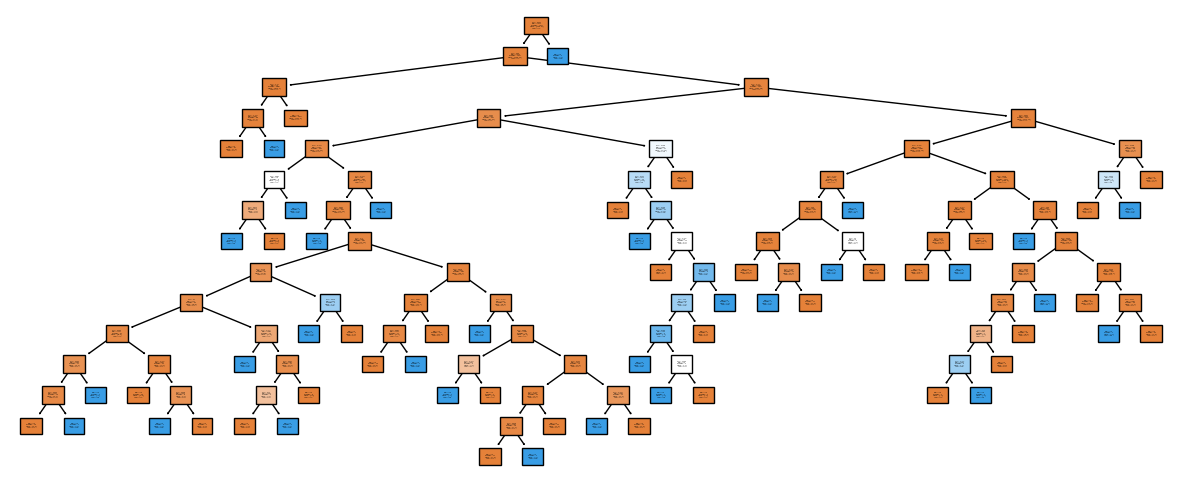

In [ ]:
plt.figure(figsize = (15,6))
plot_tree(arvorePca, filled = True, class_names = ['nao','sim'], fontsize = 1, feature_names = nome_colunas_Pca);

In [ ]:
arvorePca.score(x_treinoPca, y_treinoPca)

1.0

In [ ]:
arvorePca = DecisionTreeClassifier(max_depth = 13, random_state = 81)
arvorePca.fit(x_treinoPca, y_treinoPca)

DecisionTreeClassifier(max_depth=13, random_state=81)

In [ ]:
prevArvorePca = arvorePca.score(x_testePca, y_testePca)
prevArvorePca

0.992

### Algoritmo de previsão usando KNN

> *KNN* significa "K-Nearest Neighbors", ou "K-Vizinhos Mais Próximos".

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

##### Aplicando KNN nos dados antes do PCA

In [ ]:
# primeiramente, os dados são normalizados usando MinMaxScaler
normalizacao = MinMaxScaler()
x_treino_normalizado_Inicial = normalizacao.fit_transform(x_treinoInicial)
pd.DataFrame(x_treino_normalizado_Inicial)

,0,1,2,3,4,5
0,0.00,0.000910,0.000791,0.000086,0.000000,0.000000
1,0.00,0.001341,0.002305,0.001260,0.000000,0.000000
2,0.25,0.012254,0.116784,0.125483,0.009265,0.002427
3,0.75,0.141700,0.000000,0.000000,0.105324,0.185417
4,0.00,0.000692,0.000983,0.000445,0.000000,0.000000
...,...,...,...,...,...,...
7494,0.00,0.000139,0.000000,0.000000,0.000000,0.000000
7495,0.00,0.000033,0.000290,0.000262,0.000000,0.000000
7496,0.00,0.000502,0.002263,0.001863,0.000000,0.000000
7497,0.00,0.000081,0.000000,0.000000,0.000000,0.000000


In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_treino_normalizado_Inicial, y_treinoInicial)
x_teste_normalizado_Inicial = normalizacao.transform(x_testeInicial)
prevKnnInicial = knn.score(x_teste_normalizado_Inicial, y_testeInicial)
prevKnnInicial

0.9952

##### Aplicando KNN nos dados de PCA

In [ ]:
# primeiramente, os dados são normalizados usando MinMaxScaler
normalizacao = MinMaxScaler()
x_treino_normalizado_Pca = normalizacao.fit_transform(x_treinoPca)
pd.DataFrame(x_treino_normalizado_Pca)

,0,1,2
0,0.000122,0.417999,0.202100
1,0.145232,0.521218,0.197261
2,0.001041,0.418805,0.203043
3,0.212106,0.193038,0.261349
4,0.230038,0.535307,0.183180
...,...,...,...
7494,0.025107,0.420911,0.231163
7495,0.000448,0.418293,0.202438
7496,0.002137,0.419752,0.204162
7497,0.409738,0.724361,0.319752


In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_treino_normalizado_Pca, y_treinoPca)
x_teste_normalizado_Pca = normalizacao.transform(x_testePca)
prevKnnPca = knn.score(x_teste_normalizado_Pca, y_testePca)
prevKnnPca

0.9936

### Comparação entre as previsões

In [ ]:
print(f'Previsão utilizando o DummyClassifier')
print(f'\t. Utilizando dados antes do PCA:    {prevDummyInicial}')
print(f'\t. Utilizando dados após uso do PCA: {prevDummyPca}')

Previsão utilizando o DummyClassifier
	. Utilizando dados antes do PCA:    0.9932
	. Utilizando dados após uso do PCA: 0.9932


In [ ]:
print(f'Previsão utilizando a Árvore de Decisão')
print(f'\t. Utilizando dados antes do PCA:    {prevArvoreInicial}')
print(f'\t. Utilizando dados após uso do PCA: {prevArvorePca}')

Previsão utilizando a Árvore de Decisão
	. Utilizando dados antes do PCA:    0.9952
	. Utilizando dados após uso do PCA: 0.992


In [ ]:
print(f'Previsão utilizando o algoritmo KNN')
print(f'\t. Utilizando dados antes do PCA:    {prevKnnInicial}')
print(f'\t. Utilizando dados após uso do PCA: {prevKnnPca}')

Previsão utilizando o algoritmo KNN
	. Utilizando dados antes do PCA:    0.9952
	. Utilizando dados após uso do PCA: 0.9936
